# Balancing Patient Volume and Performance in Healthcare: A Data-Driven Perspective

## Project Description
The goal of this project is to analyze how patient volume impacts healthcare performance using data from the Centers for Medicare & Medicaid Services (CMS). The study aims to uncover actionable insights for healthcare administrators and policymakers by examining performance trends across various measures, including patient satisfaction, care coordination, and access to specialists. By employing descriptive statistics, correlation analysis, and predictive modeling, the project provides a roadmap for data-driven interventions to enhance healthcare delivery, equity, and quality of care.

This project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, ensuring a structured approach to understanding the problem, preparing the data, and deriving meaningful insights. The focus is on translating these insights into practical strategies for managing patient volume and optimizing performance across healthcare settings.

---

## Purpose and Questions

### [1. **How does patient volume affect performance across different measures?**](#How-does-patient-volume-affect-performance-across-different-measures?)
   - Identify trends in performance metrics as patient volume increases or decreases.
   - Understand which areas of healthcare delivery are most sensitive to changes in volume.

### [2. **Which performance measures are most influenced by patient volume?**](#Which-performance-measures-are-most-influenced-by-patient-volume?)
   - Use correlation analysis to determine which metrics exhibit the strongest relationships with patient volume.

### [3. **Can patient volume predict performance rates for sensitive measures?**](#Can-patient-volume-predict-performance-rates-for-sensitive-measures?)
   - Build and evaluate predictive models to assess whether patient volume can reliably forecast outcomes such as patient satisfaction and specialist access.

### [4. **What is the optimal patient volume for maximizing performance?**](#What-is-the-optimal-patient-volume-for-maximizing-performance?)
   - Identify sweet spots or ranges of patient volume associated with the best performance outcomes.

### [5. **How do performance trends vary across different measures?**](#How-do-performance-trends-vary-across-different-measures?)
   - Analyze distribution patterns and variability to understand the systemic dynamics influencing each measure.

---


### Cell 1: Loading and Inspecting the Dataset
**Purpose:**
Load the dataset from a CSV file and display the first few rows to understand the structure of the data, ensuring it has loaded correctly and reviewing initial columns and data types.

In [143]:
import pandas as pd

def load_and_preview_data(file_path):
    """
    Loads the dataset from a specified file path and previews the first few rows.

    Args:
        file_path (str): The path to the CSV file to load.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    
    Raises:
        FileNotFoundError: If the file at the given path does not exist.
        pd.errors.EmptyDataError: If the file is empty.
        pd.errors.ParserError: If the file cannot be parsed as CSV.
    """
    global data
    data = pd.read_csv(file_path)
    return data

load_and_preview_data('grp_public_reporting_cahps.csv')


,Facility Name,org_PAC_ID,measure_cd,measure_title,prf_rate,patient_count,FN
0,USC CARE MEDICAL GROUP INC,446157747,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",58.0,110.0,NaN
1,THE ASSOCIATION OF UNIVERSITY PHYSICIANS,446162697,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",52.0,129.0,NaN
2,CITY MEDICAL OF UPPER EAST SIDE PLLC,648465039,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",NaN,NaN,1.0
3,CAPE PHYSICIANS ASSOCIATES PA,749333730,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",67.0,197.0,NaN
4,ALLIANCE PHYSICIANS INC,840104360,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",59.0,227.0,NaN
...,...,...,...,...,...,...,...
427,"SOMC MEDICAL CARE FOUNDATION, INC.",9436061645,CAHPS_GRP_9,CAHPS for MIPS SSM: Care Coordination,75.0,171.0,NaN
428,SUTTER COAST HOSPITAL,9436148111,CAHPS_GRP_9,CAHPS for MIPS SSM: Care Coordination,NaN,NaN,1.0
429,WASHINGTON UNIVERSITY,9830008770,CAHPS_GRP_9,CAHPS for MIPS SSM: Care Coordination,75.0,200.0,NaN
430,SUTTER VALLEY MEDICAL FOUNDATION,9830094515,CAHPS_GRP_9,CAHPS for MIPS SSM: Care Coordination,NaN,NaN,1.0


### Cell 2: Dataset Summary and Missing Values
**Purpose:**
Get an overview of the dataset, including data types, non-null counts, and basic statistics for numeric columns. Additionally, count missing values per column to identify data quality issues.

In [144]:
def summarize_data(df):
    """
    Summarizes the dataset by displaying information on data types, non-null counts, 
    basic statistics for numeric columns, and the count of missing values per column.

    Args:
        df (pd.DataFrame): The DataFrame to summarize.

    Returns:
        pd.Series: A Series with counts of missing values per column.
    """
    print("Dataset Information:")
    df.info()
    print("\nStatistical Summary of Numeric Columns:")
    print(df.describe())
    print("\nCount of Missing Values per Column:")
    missing_counts = df.isnull().sum()
    print(missing_counts)
    return missing_counts

summarize_data(data)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Facility Name   432 non-null    object 
 1    org_PAC_ID     432 non-null    int64  
 2    measure_cd     432 non-null    object 
 3    measure_title  432 non-null    object 
 4    prf_rate       277 non-null    float64
 5    patient_count  277 non-null    float64
 6    FN             155 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB

Statistical Summary of Numeric Columns:
         org_PAC_ID    prf_rate  patient_count     FN
count  4.320000e+02  277.000000     277.000000  155.0
mean   5.510429e+09   67.685921     183.270758    1.0
std    2.748252e+09   13.320149      49.880171    0.0
min    4.461577e+08   33.000000      42.000000    1.0
25%    3.325064e+09   59.000000     147.000000    1.0
50%    5.890649e+09   68.000000     187.00

Facility Name       0
 org_PAC_ID         0
 measure_cd         0
 measure_title      0
 prf_rate         155
 patient_count    155
 FN               277
dtype: int64

#### Dataset Information

**Key Observations:**

Total Rows: 432\
Columns: 6, with the following data types:\
    - object (3): Facility Name, measure_cd, measure_title\
    - int64 (1): org_PAC_ID\
    - float64 (2): prf_rate, patient_count\
Columns prf_rate and patient_count have 155 missing values (~36%).

### Cell 3: Percentage of Missing Values
**Purpose:**
Calculate and display the percentage of missing values for each column, providing insights into the extent of missing data and highlighting potential areas that need cleaning.

In [145]:
def calculate_missing_percentages(df):
    """
    Calculates the percentage of missing values for each column in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.Series: A Series containing the percentage of missing values per column.
    """
    missing_percentages = df.isnull().sum() / len(df) * 100
    return missing_percentages

print("Percentage of Missing Values per Column:")
calculate_missing_percentages(data)


Percentage of Missing Values per Column:


Facility Name      0.00000
 org_PAC_ID        0.00000
 measure_cd        0.00000
 measure_title     0.00000
 prf_rate         35.87963
 patient_count    35.87963
 FN               64.12037
dtype: float64

#### Percentage of Missing Values

**Key Insights:**

prf_rate: 35.88% missing\
patient_count: 35.88% missing\
FN column: 64.12% missing

### Cell 4: Cleaning Column Names and Removing Unnecessary Columns
**Purpose:**
Standardize column names for consistency and remove the FN column due to its high percentage of missing values and administrative nature (according to offical database documentation include in project directory "DOC_Data_Dictionary.pdf").

In [146]:
def clean_columns_and_drop(df):
    """
    Cleans column names by stripping whitespace and removes the 'FN' column if present.

    Args:
        df (pd.DataFrame): The DataFrame to clean.

    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    df.columns = df.columns.str.strip()
    if 'FN' in df.columns:
        df = df.drop(columns=['FN'])
        print("FN column removed due to high missing values and administrative nature.")
    return df

data = clean_columns_and_drop(data)

FN column removed due to high missing values and administrative nature.


### Cell 5: Exploring Missing Data Handling Methods
**Purpose:**
Compare the effects of different missing value imputation methods (`mean`, `median`) and dropping rows on the distribution of `prf_rate`.

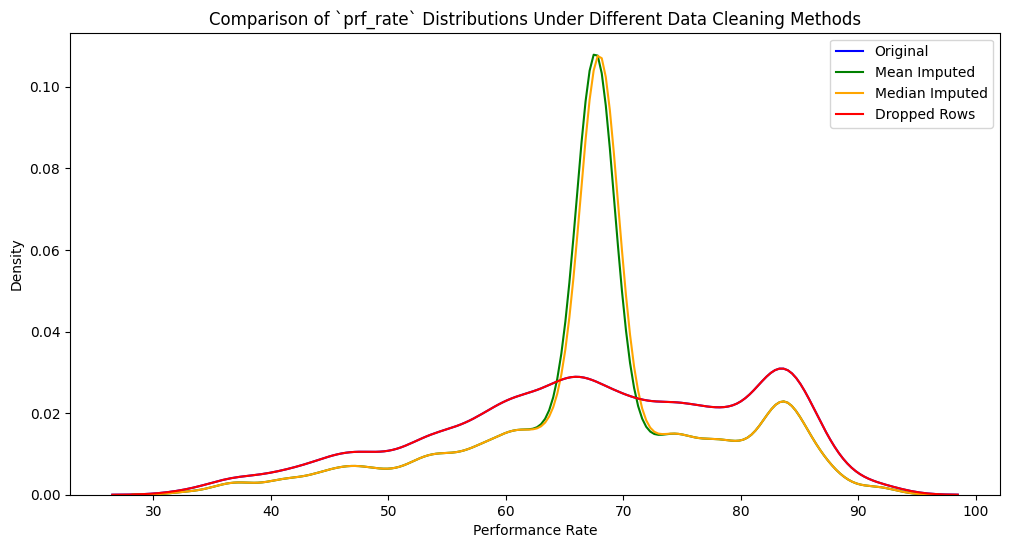

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_imputation_methods(df, column):
    """
    Compares the effects of mean and median imputation, and row dropping on the 
    distribution of a specified column with missing values.

    Args:
        df (pd.DataFrame): The DataFrame containing the column.
        column (str): The column name to process.

    Returns:
        dict: A dictionary containing original, mean-imputed, median-imputed, 
              and dropped datasets for further use.
    """
    original_data = df.copy()
    mean_imputed = df.copy()
    mean_imputed[column] = mean_imputed[column].fillna(mean_imputed[column].mean())
    
    median_imputed = df.copy()
    median_imputed[column] = median_imputed[column].fillna(median_imputed[column].median())
    
    dropped_data = df.dropna(subset=[column])
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.kdeplot(original_data[column], label='Original', color='blue', bw_adjust=0.5)
    sns.kdeplot(mean_imputed[column], label='Mean Imputed', color='green', bw_adjust=0.5)
    sns.kdeplot(median_imputed[column], label='Median Imputed', color='orange', bw_adjust=0.5)
    sns.kdeplot(dropped_data[column], label='Dropped Rows', color='red', bw_adjust=0.5)
    
    plt.title(f"Comparison of `{column}` Distributions Under Different Data Cleaning Methods")
    plt.xlabel('Performance Rate')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    return {
        'original': original_data,
        'mean_imputed': mean_imputed,
        'median_imputed': median_imputed,
        'dropped': dropped_data
    }

datasets = compare_imputation_methods(data, 'prf_rate')

**Key Observations:**
- The original data (blue) and the dropped rows (red) distributions are identical, as the blue line is completely hidden behind the red line. This demonstrates that dropping rows with missing values preserves the original data distribution most accurately.
- Mean imputation (green) shifts the distribution slightly, introducing a bias by smoothing the data around the mean, which reduces variability.
- Median imputation (yellow) also alters the distribution, creating a similar bias by flattening peaks and valleys.
- **Conclusion:** Dropping rows (red) is the most appropriate method for handling missing values in this dataset, as it avoids introducing bias and maintains the integrity of the original distribution.

### Cell 6: Statistical Testing on Imputation Methods
**Purpose:**
Perform the Kolmogorov-Smirnov (K-S) test to assess differences between the distributions of imputed datasets and the original data with dropped NaNs.

In [148]:
from scipy.stats import ks_2samp

def ks_test_imputation(original, mean_imputed, median_imputed, column):
    """
    Performs the Kolmogorov-Smirnov test to compare the distributions of original 
    data (with NaNs dropped) against mean-imputed and median-imputed datasets.

    Args:
        original (pd.DataFrame): The original DataFrame with NaNs dropped.
        mean_imputed (pd.DataFrame): The DataFrame with mean imputation applied.
        median_imputed (pd.DataFrame): The DataFrame with median imputation applied.
        column (str): The column to compare.

    Returns:
        dict: A dictionary with K-S test statistics and p-values.
    """
    ks_stat_mean, p_value_mean = ks_2samp(original[column], mean_imputed[column])
    ks_stat_median, p_value_median = ks_2samp(original[column], median_imputed[column])
    
    print(f"K-S Test between Dropped Rows and Mean Imputed Data: KS Statistic = {ks_stat_mean:.3f}, P-value = {p_value_mean:.3f}")
    print(f"K-S Test between Dropped Rows and Median Imputed Data: KS Statistic = {ks_stat_median:.3f}, P-value = {p_value_median:.3f}")
    
    return {
        'mean': {'ks_stat': ks_stat_mean, 'p_value': p_value_mean},
        'median': {'ks_stat': ks_stat_median, 'p_value': p_value_median}
    }

ks_results = ks_test_imputation(datasets['dropped'], datasets['mean_imputed'], datasets['median_imputed'], 'prf_rate')

K-S Test between Dropped Rows and Mean Imputed Data: KS Statistic = 0.184, P-value = 0.000
K-S Test between Dropped Rows and Median Imputed Data: KS Statistic = 0.175, P-value = 0.000


#### Kolmogorov-Smirnov (K-S) Test Results
**Dropped Rows vs. Mean Imputation:**

K-S Statistic: 0.184
P-value: 0.000 (statistically significant difference)
Interpretation: Mean imputation creates a distribution significantly different from the original data.

**Dropped Rows vs. Median Imputation:**

K-S Statistic: 0.175
P-value: 0.000 (statistically significant difference)
Interpretation: Median imputation also results in a distribution that differs significantly from the original data, but the difference is slightly smaller than for mean imputation.

**Overall Conclusion:** Dropping rows with missing values is the most reliable method for handling missing data in this analysis, as it preserves the original distribution without introducing distortion.

### Cell 7: Dropping Rows with Missing Values
**Purpose:**
Remove rows with missing values in critical columns to ensure the dataset is complete for further analysis.

In [149]:
def drop_missing_rows(df, columns):
    """
    Drops rows with missing values in specified columns.

    Args:
        df (pd.DataFrame): The DataFrame to clean.
        columns (list): List of columns to check for missing values.

    Returns:
        pd.DataFrame: A DataFrame with rows containing missing values removed.
    """
    cleaned_df = df.dropna(subset=columns)
    percentage_complete = len(cleaned_df) / len(df) * 100
    print(f"Percentage of rows with complete data: {percentage_complete:.2f}%")
    return cleaned_df

cleaned_data = drop_missing_rows(data, ['prf_rate', 'patient_count'])

Percentage of rows with complete data: 64.12%


### Cell 8: Detecting Outliers
**Purpose:**
Identify potential outliers in `prf_rate` and `patient_count` using Z-scores.

In [150]:
from scipy.stats import zscore
import numpy as np

def detect_outliers(df, columns, threshold=3):
    """
    Identifies outliers in specified columns based on Z-scores.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        columns (list): List of numeric columns to check for outliers.
        threshold (float): The Z-score threshold for identifying outliers.

    Returns:
        np.ndarray: Indices of outlier rows.
    """
    z_scores = np.abs(zscore(df[columns].dropna()))
    outliers = np.where(z_scores > threshold)
    print(f"Number of outliers detected: {len(outliers[0])}")
    return outliers

outliers = detect_outliers(cleaned_data, ['prf_rate', 'patient_count'])


Number of outliers detected: 0


### Cell 9: Analyzing and Grouping Data
**Purpose:**
Review the frequency of measures and calculate the mean `prf_rate` and `patient_coun`t grouped by `measure_cd`.

In [151]:
def analyze_and_group_data(df, group_by_column, target_columns):
    """
    Analyzes the frequency of values in a column and calculates the mean for target columns by groups.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        group_by_column (str): The column to group by.
        target_columns (list): List of columns to calculate mean values.

    Returns:
        pd.DataFrame: A grouped DataFrame with mean values for target columns.
    """
    print("Value Counts for Measure Code:")
    print(df[group_by_column].value_counts())
    
    grouped_data = df.groupby(group_by_column)[target_columns].mean()
    print("\nGrouped Data (Mean Values):")
    print(grouped_data)
    return grouped_data

grouped_data = analyze_and_group_data(cleaned_data, 'measure_cd', ['prf_rate', 'patient_count'])

Value Counts for Measure Code:
measure_cd
CAHPS_GRP_8    53
CAHPS_GRP_1    52
CAHPS_GRP_5    51
CAHPS_GRP_4    49
CAHPS_GRP_9    46
CAHPS_GRP_3    26
Name: count, dtype: int64

Grouped Data (Mean Values):
              prf_rate  patient_count
measure_cd                           
CAHPS_GRP_1  63.788462     154.884615
CAHPS_GRP_3  83.307692     199.269231
CAHPS_GRP_4  48.551020     142.346939
CAHPS_GRP_5  62.470588     214.156863
CAHPS_GRP_8  82.622642     184.169811
CAHPS_GRP_9  72.217391     214.630435


#### Value Counts for measure_cd and Grouped Data
**Key Insights:**
- The most frequent measure_cd is CAHPS_GRP_8 (53 occurrences), while the least frequent is CAHPS_GRP_3 (26 occurrences).
- Measures such as CAHPS_GRP_3 and CAHPS_GRP_8 exhibit higher average prf_rate values (around 83%), while others like CAHPS_GRP_4 have lower performance rates (~49%).
- Patient counts are highest for CAHPS_GRP_9 (214) and lowest for CAHPS_GRP_4 (142).

### Cell 10: Plotting the Distribution of prf_rate
**Purpose:**
Visualize the distribution of `prf_rate` to understand its spread and identify potential patterns.

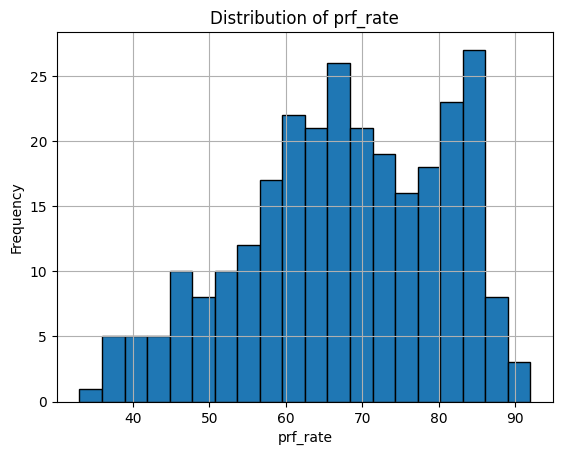

In [152]:
def plot_histogram(df, column, bins=20):
    """
    Plots a histogram for the specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to plot.
        bins (int): Number of bins for the histogram.

    Returns:
        None
    """
    df[column].hist(bins=bins, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(cleaned_data, 'prf_rate')

#### Histogram of prf_rate Distribution
**Key Observations:**
- The distribution appears roughly bimodal, with peaks around 60-70 and 80-90.
- There is no significant skew, but the lower range (30-50) has fewer data points.
- This distribution helps understand the performance variability across measures.

### Cell 11: Comparing Performance by Patient Volume
**Purpose:**
Segment the dataset into low and high patient volume groups based on quartiles and compare their average `prf_rate`.

In [153]:
def compare_performance_by_volume(df, column, target_column):
    """
    Compares the mean performance of low and high patient volume groups based on quartiles.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        column (str): The column representing volume.
        target_column (str): The performance column to compare.

    Returns:
        tuple: Mean performance for low and high volume groups.
    """
    quartiles = df[column].quantile([0.25, 0.75])
    low_volume = df[df[column] <= quartiles[0.25]]
    high_volume = df[df[column] >= quartiles[0.75]]
    
    low_mean = low_volume[target_column].mean()
    high_mean = high_volume[target_column].mean()
    
    print(f"Low Volume Mean Performance: {low_mean:.2f}")
    print(f"High Volume Mean Performance: {high_mean:.2f}")
    return low_mean, high_mean

low_perf, high_perf = compare_performance_by_volume(data, 'patient_count', 'prf_rate')

Low Volume Mean Performance: 64.41
High Volume Mean Performance: 71.57


#### Low and High Volume Performance Comparison
**Key Insights:**
- Low Volume Mean Performance: 64.41
- High Volume Mean Performance: 71.57
- **Conclusion:** Higher patient volumes are associated with better performance rates, suggesting the need for further exploration of volume-performance dynamics.

### Cell 12: Boxplot for prf_rate by Measure
**Purpose:**
Visualize the distribution of `prf_rate` for each measure to identify variability and outliers.

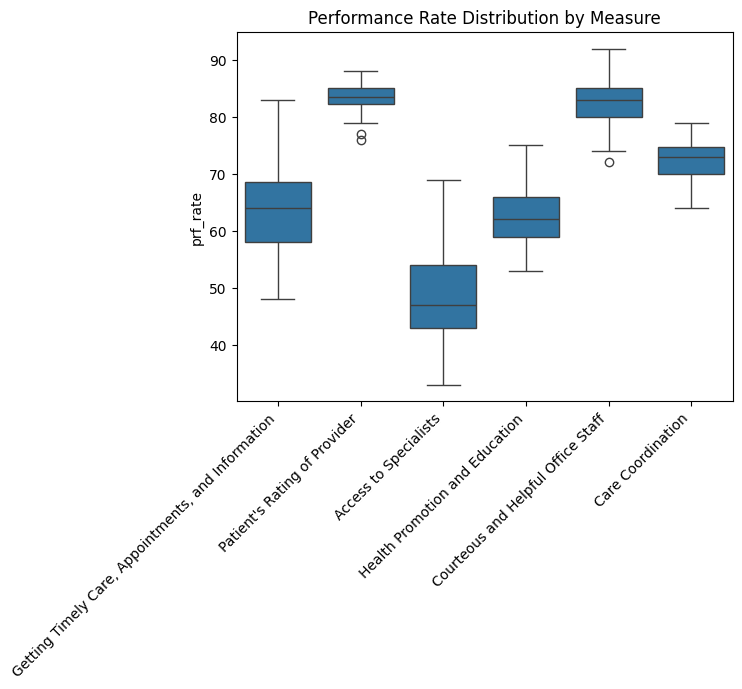

In [154]:
def plot_boxplot_by_measure(df, title_column, value_column, cleaned_column_name):
    """
    Creates a boxplot for a performance metric grouped by measure title.

    Args:
        df (pd.DataFrame): The DataFrame to plot.
        title_column (str): The column containing measure titles.
        value_column (str): The column representing the performance metric.
        cleaned_column_name (str): The new column for cleaned measure titles.

    Returns:
        None
    """
    df = df.copy()
    df[cleaned_column_name] = df[title_column].str.replace('CAHPS for MIPS SSM: ', '', regex=False)
    sns.boxplot(data=df, x=cleaned_column_name, y=value_column)
    plt.xticks(rotation=45, ha='right')
    plt.title('Performance Rate Distribution by Measure')
    plt.ylabel(value_column)
    plt.xlabel('')
    plt.show()

plot_boxplot_by_measure(cleaned_data, 'measure_title', 'prf_rate', 'measure_title_clean')

#### Boxplot: Performance Rate Distribution by Measure
**Key Observations:**
- Variability: Measures such as "Access to Specialists" and "Health Promotion and Education" exhibit wider variability in performance rates, indicating inconsistencies.
- Outliers: Measures like "Patient's Rating of Provider" and "Courteous and Helpful Office Staff" show a few outliers above their interquartile ranges.
- Higher Performance Rates: "Patient's Rating of Provider" consistently shows higher performance rates compared to others, with medians close to 85-90%.
- Lower Performance Rates: "Access to Specialists" and "Health Promotion and Education" exhibit the lowest median performance rates (~45-55%).

### Cell 13: Scatter Plot with Quadratic Trendline
**Purpose:**
Visualize the relationship between `patient_count` and `prf_rate`, fitting a quadratic trendline.

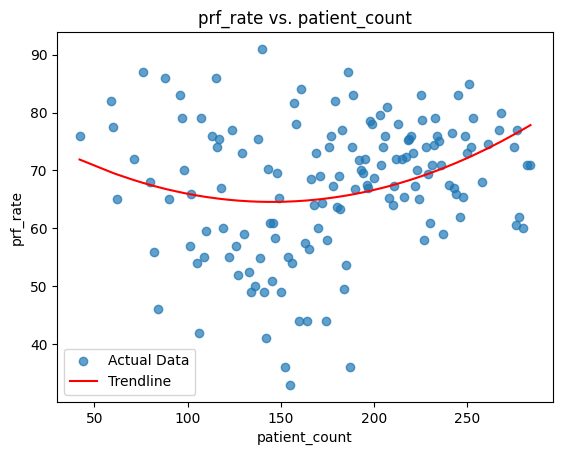

In [155]:
def plot_scatter_with_trendline(df, x_column, y_column):
    """
    Creates a scatter plot with a quadratic trendline.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        x_column (str): The x-axis variable.
        y_column (str): The y-axis variable.

    Returns:
        None
    """
    grouped_data = df.groupby(x_column)[y_column].mean().reset_index()
    x = grouped_data[x_column]
    y = grouped_data[y_column]
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    plt.scatter(x, y, label='Actual Data', alpha=0.7)
    plt.plot(x, p(x), color='red', label='Trendline')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.legend()
    plt.show()

plot_scatter_with_trendline(cleaned_data, 'patient_count', 'prf_rate')

#### Scatter Plot with Quadratic Trendline: `prf_rate` vs. `patient_count`
**Key Observations:**
- Quadratic Trend: The curve suggests a U-shaped relationship between patient_count and prf_rate, where performance decreases initially with increasing patient count but improves for higher patient counts.
- Densely Populated Regions: Most data points are clustered between 100-200 patient counts, where variability in performance rates is more pronounced.

### Cell 14: Measure-Specific Scatter Plots
**Purpose:**
Iterate through each measure to create individual scatter plots with quadratic trendlines for `patient_count` and `prf_rate`.

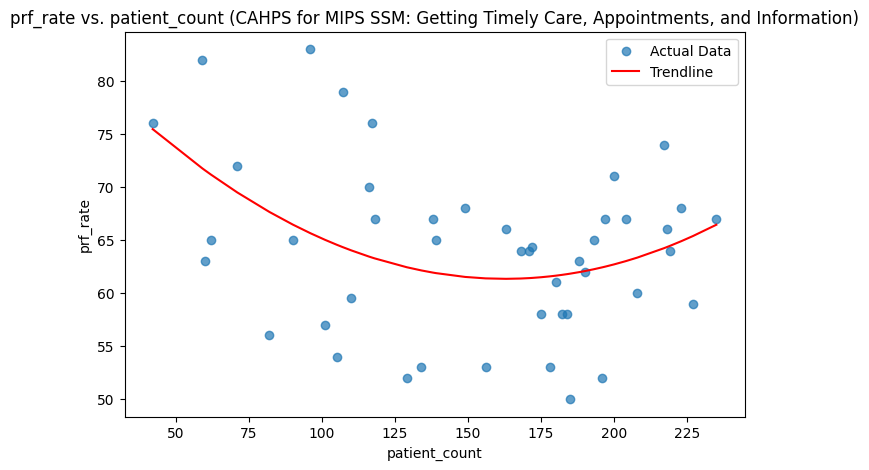

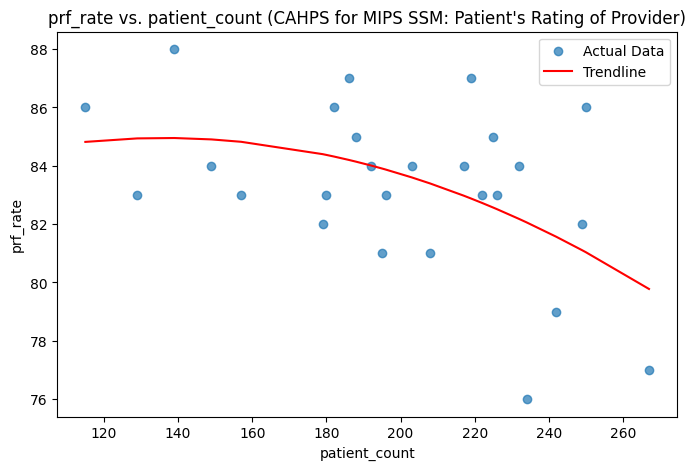

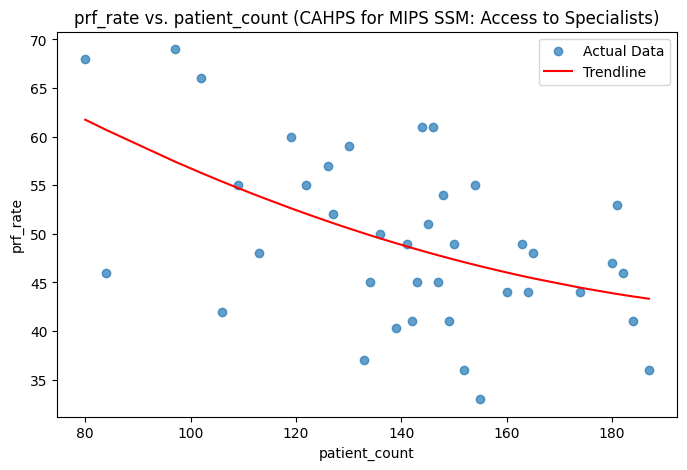

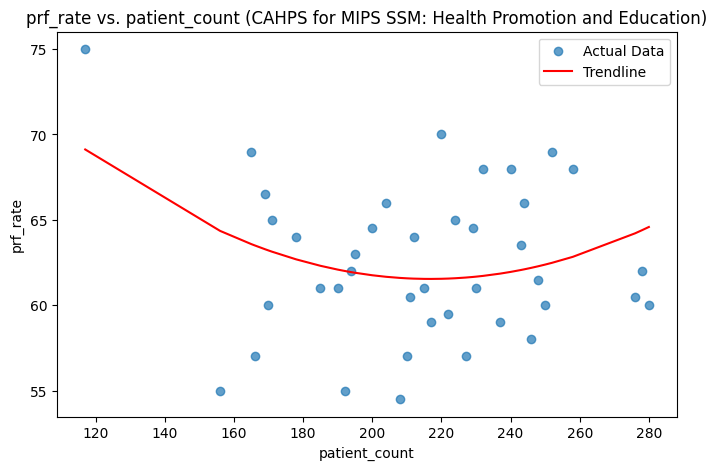

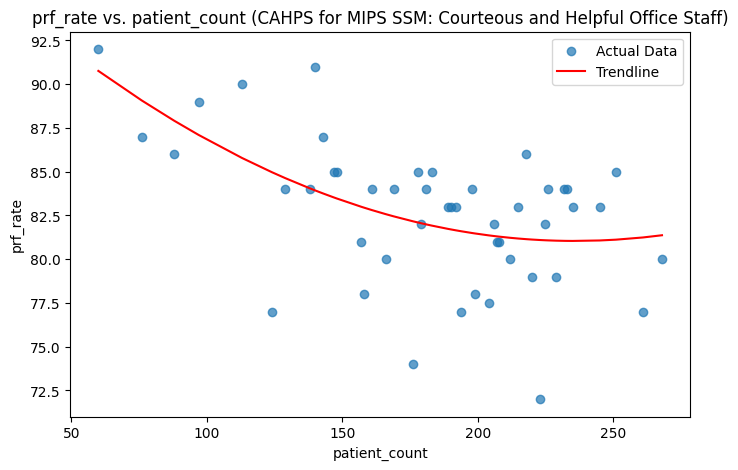

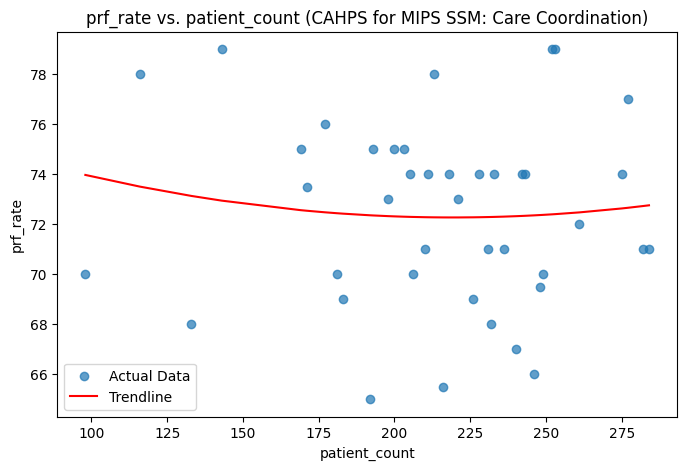

In [156]:
def plot_measure_specific_trendlines(df, measure_column, x_column, y_column):
    """
    Creates scatter plots with trendlines for each unique measure.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        measure_column (str): The column representing the measure.
        x_column (str): The x-axis variable.
        y_column (str): The y-axis variable.

    Returns:
        None
    """
    for measure in df[measure_column].unique():
        subset = df[df[measure_column] == measure]
        grouped_data = subset.groupby(x_column)[y_column].mean().reset_index()

        x = grouped_data[x_column]
        y = grouped_data[y_column]
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)

        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, label='Actual Data', alpha=0.7)
        plt.plot(x, p(x), color='red', label='Trendline')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'{y_column} vs. {x_column} ({measure})')
        plt.legend()
        plt.show()

plot_measure_specific_trendlines(cleaned_data, 'measure_title', 'patient_count', 'prf_rate')

#### Measure-Specific Scatter Plots with Trendlines
**Key Observations by Measure:**
- Getting Timely Care, Appointments, and Information:
    - Weak negative correlation (-0.245).
    - A slightly concave trend suggests decreasing performance with moderate patient counts but recovery at higher volumes.
- Patient's Rating of Provider:
    - Moderate negative correlation (-0.452, significant).
    - Performance rate declines consistently with increasing patient count, suggesting a challenge in maintaining high ratings under higher volumes.
- Access to Specialists:
    - Moderate negative correlation (-0.435, significant).
    - Performance sharply declines as patient count increases, highlighting a potential systemic issue.
- Health Promotion and Education:
    - Weak negative correlation (-0.143, not significant).
    - Performance variability is scattered, with a slight dip at moderate volumes.
- Courteous and Helpful Office Staff:
    - Strong negative correlation (-0.488, highly significant).
    - Performance declines with increasing patient count, possibly due to the strain on staff resources.
- Care Coordination:
    - Weak negative correlation (-0.078, not significant).
    - The trendline shows minimal change, suggesting patient count has limited impact on care coordination.

### Cell 15: Correlation Analysis
**Purpose:**
Compute Pearson correlation and statistical significance between `patient_count` and `prf_rate` for each measure.

In [157]:
from scipy.stats import pearsonr

def analyze_correlation(df, measure_column, x_column, y_column):
    """
    Calculates correlations and statistical significance between variables for each measure.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        measure_column (str): The column representing the measure.
        x_column (str): The x-axis variable.
        y_column (str): The y-axis variable.

    Returns:
        dict: Correlation and p-value for each measure.
    """
    results = {}
    print("Correlations and Statistical Significance Between Patient Count and Performance Rate by Measure:")
    for measure in df[measure_column].unique():
        subset = df[df[measure_column] == measure]
        if len(subset) > 2:  # Ensure enough data points
            corr, p_value = pearsonr(subset[x_column].dropna(), subset[y_column].dropna())
            print(f"{measure}: Correlation = {corr:.3f}, P-value = {p_value:.3f}")
            results[measure] = {'correlation': corr, 'p_value': p_value}
    return results

correlation_results = analyze_correlation(cleaned_data, 'measure_title', 'patient_count', 'prf_rate')

Correlations and Statistical Significance Between Patient Count and Performance Rate by Measure:
CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information: Correlation = -0.245, P-value = 0.080
CAHPS for MIPS SSM: Patient's Rating of Provider: Correlation = -0.452, P-value = 0.020
CAHPS for MIPS SSM: Access to Specialists: Correlation = -0.435, P-value = 0.002
CAHPS for MIPS SSM: Health Promotion and Education: Correlation = -0.143, P-value = 0.318
CAHPS for MIPS SSM: Courteous and Helpful Office Staff: Correlation = -0.488, P-value = 0.000
CAHPS for MIPS SSM: Care Coordination: Correlation = -0.078, P-value = 0.605


#### Correlation Analysis
**Key Results:**
- Strongest Negative Correlation:
    - "Courteous and Helpful Office Staff" (-0.488, highly significant) indicates a clear inverse relationship between patient count and performance.
- Moderate Negative Correlations:
    - "Patient's Rating of Provider" (-0.452, significant).
    - "Access to Specialists" (-0.435, significant).
- Weak or Insignificant Correlations: 
    - Measures like "Care Coordination" (-0.078) and "Health Promotion and Education" (-0.143) suggest little impact from patient count.

**Conclusion:**
The analysis highlights measures where patient count significantly impacts performance (e.g., "Courteous and Helpful Office Staff") and those that are relatively stable ("Care Coordination"). This information is critical for targeted interventions.

### Cell 16: Data Preprocessing for Modeling
**Purpose:**
Prepare data for machine learning by splitting into train/test sets and standardizing features.

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(df, measure_column, feature_column='patient_count', target_column='prf_rate'):
    """
    Preprocesses data for modeling by filtering a specific measure, splitting into train/test sets, 
    and standardizing features.

    Args:
        df (pd.DataFrame): The DataFrame to preprocess.
        measure_column (str): The column representing the measure.
        feature_column (str): The feature column to use for modeling.
        target_column (str): The target column to predict.

    Returns:
        tuple: Standardized train/test splits for features and target.
    """
    subset = df[df['measure_title'] == measure_column]
    X = subset[[feature_column]].values
    y = subset[target_column].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

### Evaluating Predictive Models and Visualizing Actual vs. Predicted Performance Rates
**Purpose:**
This cell aims to evaluate multiple predictive models (Linear Regression, Random Forest, SVR, and Quadratic Fit) to identify the best-performing model for predicting performance rates (prf_rate) based on patient counts for each measure. 

**Key objectives include:**
- Calculating MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) for model evaluation.
- Selecting the best model for each measure based on performance metrics.
- Visualizing the relationship between actual and predicted performance rates for the best model to assess its accuracy and alignment with the ideal prediction.


Evaluating models for: CAHPS for MIPS SSM: Courteous and Helpful Office Staff
Linear Regression: MAE = 2.74, RMSE = 3.33
Random Forest: MAE = 2.40, RMSE = 3.12
Support Vector Regressor (SVR): MAE = 2.21, RMSE = 3.06
Quadratic Fit: MAE = 2.43, RMSE = 3.00
Best Model for CAHPS for MIPS SSM: Courteous and Helpful Office Staff: Support Vector Regressor (SVR), Metrics: {'MAE': np.float64(2.2075965952581837), 'RMSE': np.float64(3.0595956446746513)}


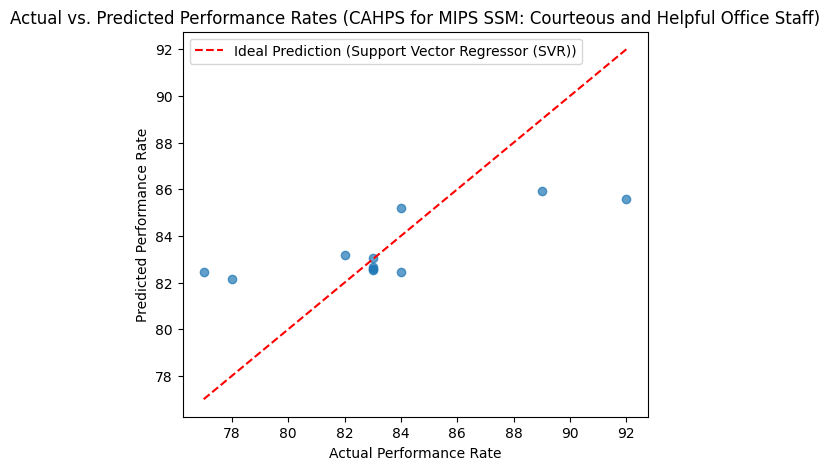


Evaluating models for: CAHPS for MIPS SSM: Access to Specialists
Linear Regression: MAE = 6.04, RMSE = 7.12
Random Forest: MAE = 8.25, RMSE = 9.76
Support Vector Regressor (SVR): MAE = 5.03, RMSE = 5.75
Quadratic Fit: MAE = 6.41, RMSE = 8.08
Best Model for CAHPS for MIPS SSM: Access to Specialists: Support Vector Regressor (SVR), Metrics: {'MAE': np.float64(5.028262399286219), 'RMSE': np.float64(5.746697070587173)}


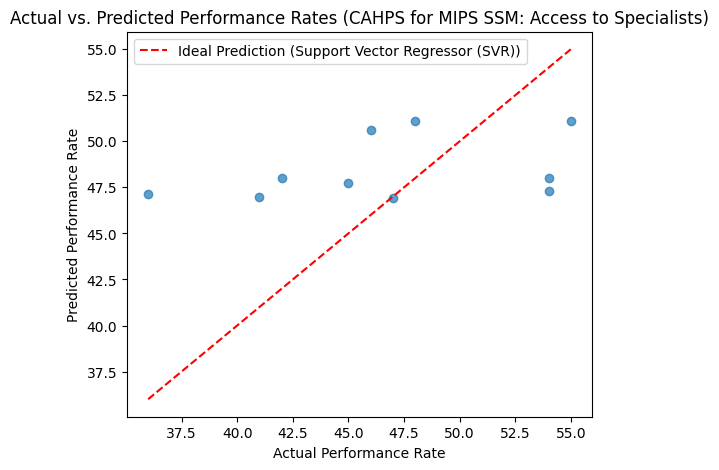


Evaluating models for: CAHPS for MIPS SSM: Patient's Rating of Provider
Linear Regression: MAE = 1.42, RMSE = 1.54
Random Forest: MAE = 2.37, RMSE = 2.97
Support Vector Regressor (SVR): MAE = 1.81, RMSE = 2.05
Quadratic Fit: MAE = 1.72, RMSE = 1.82
Best Model for CAHPS for MIPS SSM: Patient's Rating of Provider: Linear Regression, Metrics: {'MAE': np.float64(1.4226607658665433), 'RMSE': np.float64(1.543062679824174)}


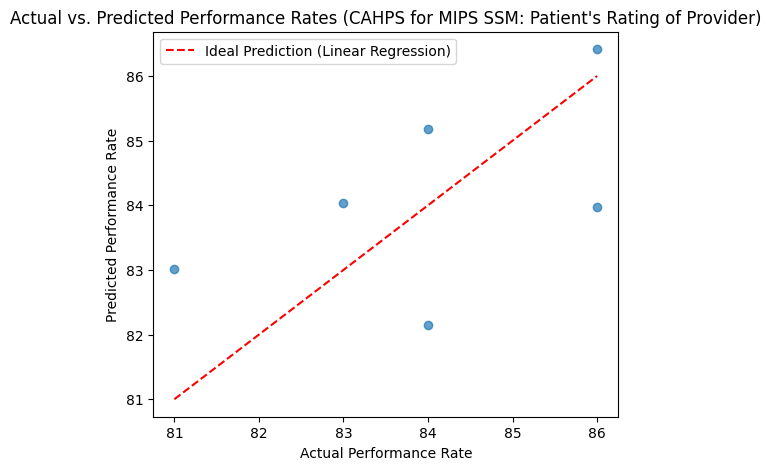

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np

def evaluate_models(data, measure, models):
    """
    Evaluates multiple models on a specific measure by calculating MAE and RMSE.

    Args:
        data (pd.DataFrame): The cleaned dataset.
        measure (str): The measure to evaluate (e.g., "Patient's Rating of Provider").
        models (dict): A dictionary of model names and initialized model objects.

    Returns:
        dict: A dictionary containing the best model name and its evaluation metrics.
    """
    print(f"\nEvaluating models for: {measure}")
    
    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(data, measure, 'patient_count', 'prf_rate')
    
    best_model_name = None
    best_mae = float('inf')
    best_metrics = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        print(f"{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}")
        
        if mae < best_mae:
            best_mae = mae
            best_model_name = model_name
            best_metrics = {'MAE': mae, 'RMSE': rmse}
    
    # Evaluate Quadratic Fit
    z = np.polyfit(X_train.flatten(), y_train, 2)
    p = np.poly1d(z)
    y_pred_quad = p(X_test.flatten())
    mae_quad = mean_absolute_error(y_test, y_pred_quad)
    rmse_quad = root_mean_squared_error(y_test, y_pred_quad)
    print(f"Quadratic Fit: MAE = {mae_quad:.2f}, RMSE = {rmse_quad:.2f}")
    
    if mae_quad < best_mae:
        best_mae = mae_quad
        best_model_name = "Quadratic Fit"
        best_metrics = {'MAE': mae_quad, 'RMSE': rmse_quad}
    
    return {'best_model': best_model_name, 'metrics': best_metrics}

def plot_actual_vs_predicted(data, measure, best_model_name, models):
    """
    Plots actual vs. predicted performance rates for the best model.

    Args:
        data (pd.DataFrame): The cleaned dataset.
        measure (str): The measure to evaluate.
        best_model_name (str): The name of the best model.
        models (dict): A dictionary of model names and initialized model objects.

    Returns:
        None
    """
    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(data, measure, 'patient_count', 'prf_rate')
    
    if best_model_name == "Quadratic Fit":
        z = np.polyfit(X_train.flatten(), y_train, 2)
        p = np.poly1d(z)
        y_pred = p(X_test.flatten())
    else:
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
    
    # Scatter plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label=f'Ideal Prediction ({best_model_name})')
    plt.title(f"Actual vs. Predicted Performance Rates ({measure})")
    plt.xlabel("Actual Performance Rate")
    plt.ylabel("Predicted Performance Rate")
    plt.legend()
    plt.show()

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf')
}

# Evaluate models for each selected measure and plot results
selected_measures = [
    "CAHPS for MIPS SSM: Courteous and Helpful Office Staff",
    "CAHPS for MIPS SSM: Access to Specialists",
    "CAHPS for MIPS SSM: Patient's Rating of Provider"
]

for measure in selected_measures:
    evaluation = evaluate_models(cleaned_data, measure, models)
    print(f"Best Model for {measure}: {evaluation['best_model']}, Metrics: {evaluation['metrics']}")
    plot_actual_vs_predicted(cleaned_data, measure, evaluation['best_model'], models)


#### Model Evaluation Metrics Across All Measures

**Courteous and Helpful Office Staff**
- Best model: Support Vector Regressor (SVR).
- MAE: 2.21, RMSE: 3.06.
- Quadratic Fit is a close alternative but performs slightly worse.

**Access to Specialists**
- Best model: Support Vector Regressor (SVR).
- MAE: 5.03, RMSE: 5.75.
- Random Forest shows poor performance due to higher variability in predictions.

**Patient's Rating of Provider**
- Best model: Linear Regression.
- MAE: 1.42, RMSE: 1.54.
- Simpler models outperform, indicating a linear relationship.

#### Actual vs. Predicted Performance Rates
**Courteous and Helpful Office Staff**
- **Model Performance:**
    - Best Model: Support Vector Regressor (SVR)
    - Predictions are closely aligned with the actual values, as the points cluster near the ideal dashed red line.
    - MAE: 2.21, RMSE: 3.06, indicating high accuracy.
    - Quadratic Fit also performs well, showing a similar clustering of predictions.
- **Insights:**
    - Non-linear models such as SVR and Quadratic Fit capture the variability in this measure better than Linear Regression.

**Access to Specialists**
- **Model Performance:**
    - Best Model: Support Vector Regressor (SVR)
    - Predictions align well with actual values, outperforming other models with a MAE: 5.03 and RMSE: 5.75.
    - Random Forest struggles, producing higher error values (MAE = 8.25, RMSE = 9.76).
- **Insights:**
    - This measure shows higher prediction variability, suggesting further feature engineering or model tuning may be needed.

**Patient's Rating of Provider**
- **Model Performance:**
    - Best Model: Linear Regression
    - Predictions are highly aligned with actual values, with a MAE: 1.42 and RMSE: 1.54, outperforming more complex models.
    - Quadratic Fit and SVR add complexity without significant improvement.
- **Insights:**
    - A linear relationship between patient count and performance is apparent, making Linear Regression the most appropriate choice.

### How does patient volume affect performance across different measures?
**Purpose:**
This visualization examines how patient volume (patient_count) impacts performance rates (prf_rate) for various healthcare measures. By fitting quadratic trendlines, it highlights the dynamics of performance under varying patient volumes.

**Insights:**
- Getting Timely Care: A parabolic trend suggests performance declines initially as patient volume increases but improves slightly at higher volumes.
- Patient's Rating of Provider: Shows a slight decline, indicating reduced performance as patient volume increases.
- Access to Specialists: A steady decline demonstrates a clear drop in performance with increasing patient volume.
- Health Promotion and Education: Similar to Timely Care, a parabolic trend implies a non-linear relationship with patient volume.
- Courteous and Helpful Office Staff: A slight decline suggests a minor but consistent negative impact of patient volume on performance.
- Care Coordination: Displays a flat trend, indicating that patient volume has minimal influence on this measure.

**Why It Answers the Question:**
The graph directly visualizes trends in performance metrics as patient volume changes, offering insights into which measures are most and least sensitive to volume variations.

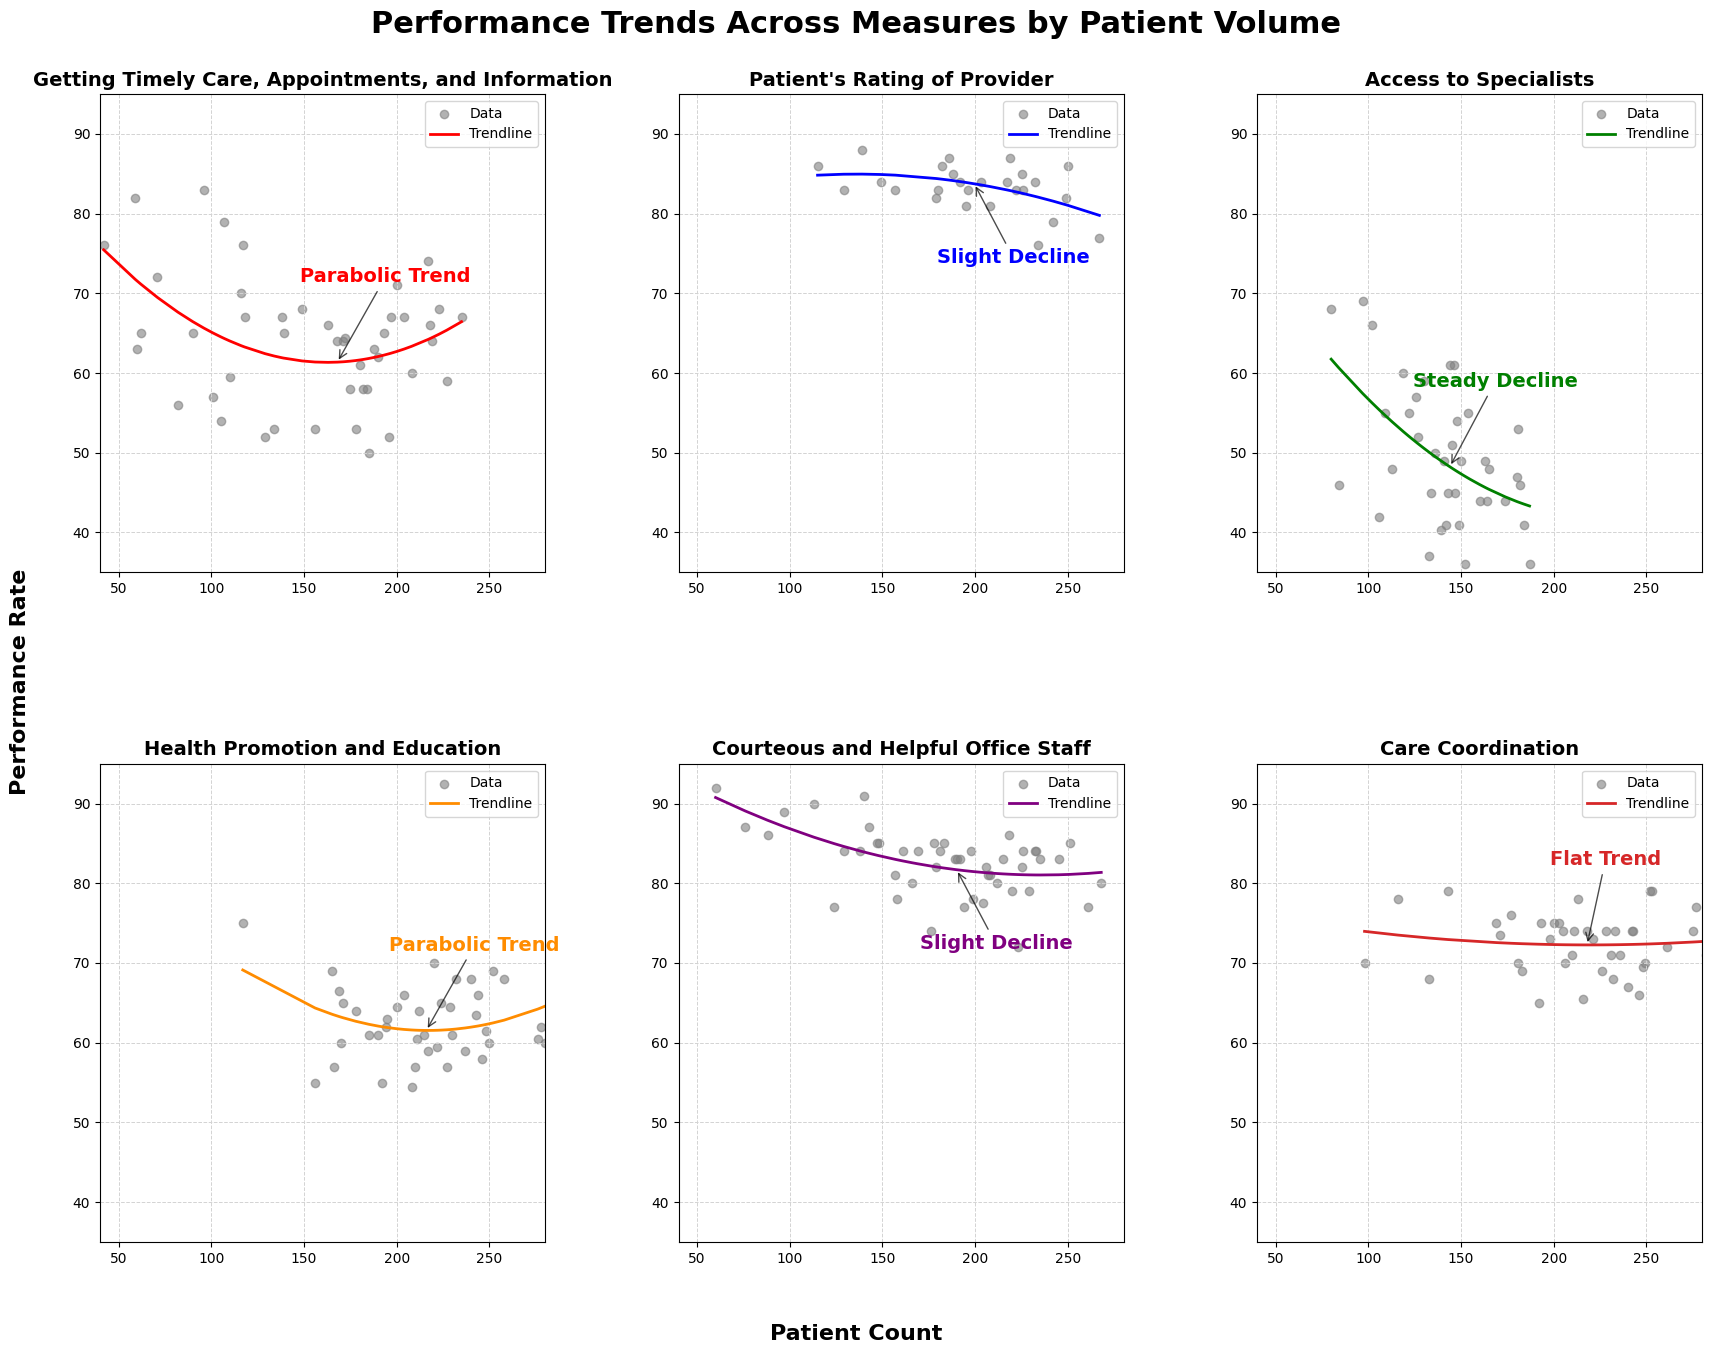

In [165]:
# Key insights
key_insights = {
    'CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information': 'Parabolic Trend',
    'CAHPS for MIPS SSM: Patient\'s Rating of Provider': 'Slight Decline',
    'CAHPS for MIPS SSM: Access to Specialists': 'Steady Decline',
    'CAHPS for MIPS SSM: Health Promotion and Education': 'Parabolic Trend',
    'CAHPS for MIPS SSM: Courteous and Helpful Office Staff': 'Slight Decline',
    'CAHPS for MIPS SSM: Care Coordination': 'Flat Trend'
}

def plot_performance_trends(data, key_insights, colors, x_min, x_max, y_min, y_max):
    """
    Plots performance trends across measures by patient volume.

    Args:
        data (pd.DataFrame): The dataset containing measures, patient counts, and performance rates.
        key_insights (dict): Annotations for trends in performance metrics for each measure.
        colors (list): List of colors for trendlines corresponding to each measure.
        x_min, x_max (int): X-axis limits for patient counts.
        y_min, y_max (int): Y-axis limits for performance rates.

    Returns:
        None
    """
    fig, axs = plt.subplots(2, 3, figsize=(18, 14))
    fig.subplots_adjust(hspace=0.4, wspace=0.3, top=0.92, bottom=0.1, left=0.08, right=0.97)
    fig.suptitle('Performance Trends Across Measures by Patient Volume', fontsize=22, fontweight='bold')

    for ax, (measure, color) in zip(axs.flat, zip(data['measure_title'].unique(), colors)):
        subset = data[data['measure_title'] == measure]
        grouped = subset.groupby('patient_count')['prf_rate'].mean().reset_index()

        x = grouped['patient_count']
        y = grouped['prf_rate']
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)

        ax.scatter(x, y, color='grey', alpha=0.6, label='Data')
        ax.plot(x, p(x), color=color, linewidth=2, label='Trendline')

        annotation = key_insights.get(measure, 'No Trend Found')
        ax.annotate(
            annotation, xy=(x.median(), p(x.median())),
            xytext=(x.median() - 20, p(x.median()) - 10 if measure in ['CAHPS for MIPS SSM: Patient\'s Rating of Provider', 'CAHPS for MIPS SSM: Courteous and Helpful Office Staff'] else p(x.median()) + 10),
            color=color, arrowprops=dict(facecolor=color, arrowstyle='->', alpha=0.7), fontsize=14, fontweight='bold'
        )

        ax.set_title(measure.split(': ')[-1], fontsize=14, fontweight='bold')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.grid(color='lightgrey', linestyle='--', linewidth=0.7)
        ax.legend(loc='upper right', fontsize=10)

    fig.text(0.5, 0.03, 'Patient Count', ha='center', fontsize=16, fontweight='bold')
    fig.text(0.03, 0.5, 'Performance Rate', va='center', rotation='vertical', fontsize=16, fontweight='bold')
    plt.show()

plot_performance_trends(
    cleaned_data, key_insights,
    colors=['red', 'blue', 'green', '#FF8C00', 'purple', '#d62728'],
    x_min=40, x_max=280, y_min=35, y_max=95
)

### Which performance measures are most influenced by patient volume?

**Purpose:**
This bar chart quantifies the correlation between patient volume (patient_count) and performance rates (prf_rate) for all measures, dividing them into two categories: those strongly influenced by patient volume (|correlation| > 0.4) and those less influenced (|correlation| <= 0.4).

**Insights:**
- Most Influenced Measures: 
    - Courteous and Helpful Office Staff (-0.49) exhibits the strongest negative correlation, indicating that performance decreases significantly as patient volume increases.
    - Patient's Rating of Provider (-0.45) and Access to Specialists (-0.44) also show strong negative correlations.
- Less Influenced Measures:
    - Health Promotion and Education (-0.35) and Timely Care (-0.22) exhibit weaker correlations, suggesting moderate sensitivity to patient volume.
    - Care Coordination (-0.15) shows the weakest correlation, indicating minimal impact from patient volume.

**Why It Answers the Question:**
The graph clearly categorizes measures by their sensitivity to patient volume, highlighting those most and least impacted, enabling targeted performance improvement strategies.

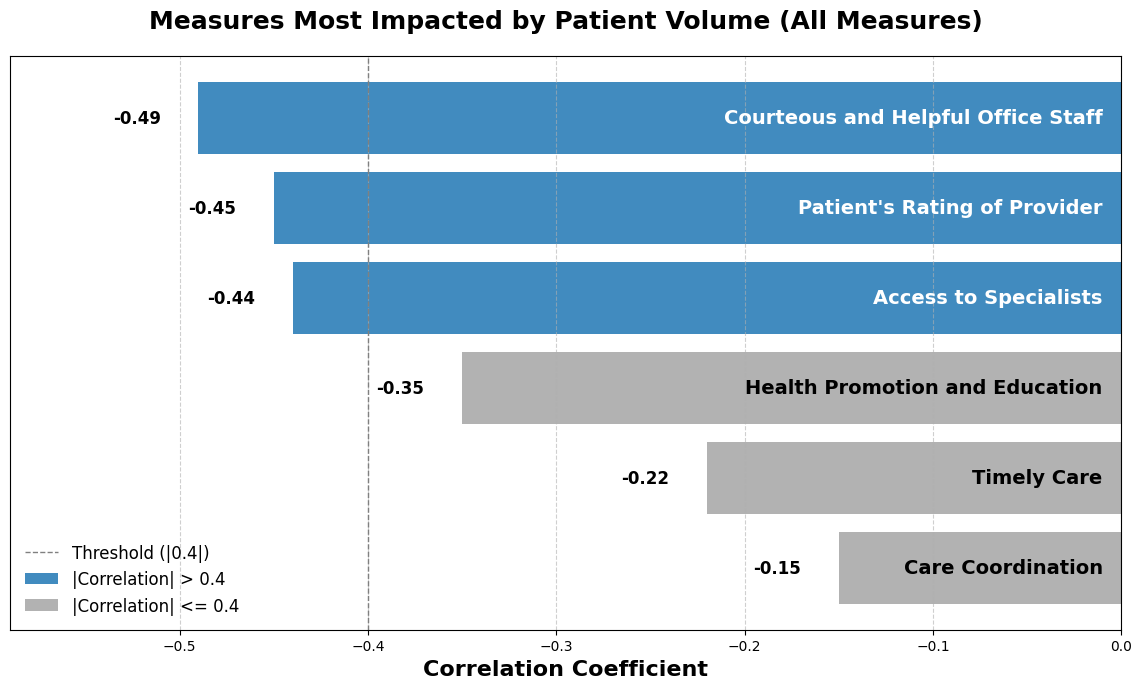

In [170]:
def plot_correlation_bar():
    """
    Visualizes measures based on their correlation coefficients with patient volume.

    Args:
        None

    Returns:
        None
    """
    # Define all measures with their correlation values
    all_measures = {
        'Courteous and Helpful Office Staff': -0.49,
        'Patient\'s Rating of Provider': -0.45,
        'Access to Specialists': -0.44,
        'Health Promotion and Education': -0.35,
        'Timely Care': -0.22,
        'Care Coordination': -0.15
    }
    
    # Separate highlighted and non-highlighted measures
    highlighted_measures = {key: val for key, val in all_measures.items() if abs(val) > 0.4}
    non_highlighted_measures = {key: val for key, val in all_measures.items() if abs(val) <= 0.4}

    # Create the plot
    plt.figure(figsize=(14, 7))
    bars_highlighted = plt.barh(
        list(highlighted_measures.keys()), list(highlighted_measures.values()),
        color='#1f77b4', alpha=0.85, label='|Correlation| > 0.4'
    )
    bars_non_highlighted = plt.barh(
        list(non_highlighted_measures.keys()), list(non_highlighted_measures.values()),
        color='grey', alpha=0.6, label='|Correlation| <= 0.4'
    )

    # Add annotations for all bars
    for bar, corr in zip(bars_highlighted + bars_non_highlighted,
                        list(highlighted_measures.values()) + list(non_highlighted_measures.values())):
        # Place correlation value
        plt.text(bar.get_width() - 0.02 if corr < 0 else bar.get_width() + 0.02,
                bar.get_y() + bar.get_height() / 2,
                f'{corr:.2f}', ha='right' if corr < 0 else 'left',
                va='center', fontsize=12, color='black', fontweight='bold')

    # Adjust x-axis range if all correlations are negative
    if max(all_measures.values()) <= 0:
        plt.xlim(min(all_measures.values()) - 0.1, 0)
    else:
        plt.xlim(min(all_measures.values()) - 0.1, max(all_measures.values()) + 0.1)

    # Add gridlines and threshold lines
    plt.axvline(x=-0.4, color='gray', linestyle='--', linewidth=1, label='Threshold (|0.4|)')
    plt.axvline(x=0.4, color='gray', linestyle='--', linewidth=1)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Customize labels and title
    plt.xlabel('Correlation Coefficient', fontsize=16, fontweight='bold')
    plt.title('Measures Most Impacted by Patient Volume (All Measures)', fontsize=18, fontweight='bold', pad=20)
    plt.legend(loc='lower left', fontsize=12, frameon=False)
    plt.gca().invert_yaxis()  # Invert y-axis for better hierarchy
    plt.tight_layout()

    # Remove left y-axis labels and adjust bar text spacing
    plt.gca().set_yticks([])
    for bar, label in zip(bars_highlighted + bars_non_highlighted, all_measures.keys()):
        text_color = 'white' if label in [
            'Courteous and Helpful Office Staff',
            'Patient\'s Rating of Provider',
            'Access to Specialists'
        ] else 'black'
        plt.text(-0.01, bar.get_y() + bar.get_height() / 2,
                label, ha='right', va='center', fontsize=14, fontweight='bold', color=text_color)

    # Show the plot
    plt.show()

plot_correlation_bar()

### Can patient volume predict performance rates for sensitive measures?
**Purpose:**
This set answers Question 3 by evaluating how well models predict performance rates for selected measures, using R² values as an indicator of model accuracy.

**Insights:**
- Patient's Rating of Provider: R² = 0.21, indicating a weak predictive relationship.
- Access to Specialists: R² = 0.06, suggesting the model struggles to capture variability.
- Courteous and Helpful Office Staff: R² = 0.42, showing moderate predictive power.

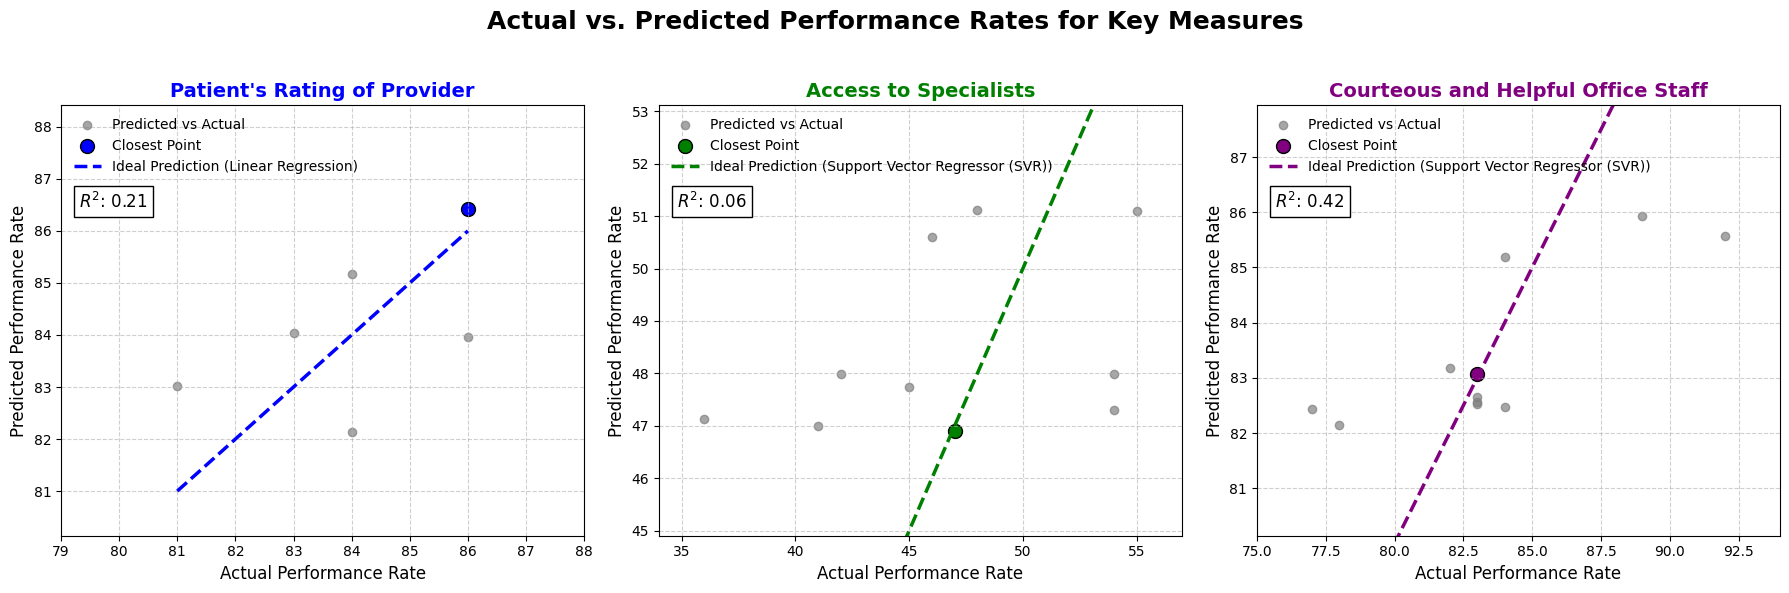

In [177]:
def plot_actual_vs_predicted(data, models, best_models, colors, title):
    """
    Plots actual vs. predicted performance rates for selected measures and evaluates model performance.

    Args:
        data (pd.DataFrame): The dataset containing measures, patient counts, and performance rates.
        models (dict): Dictionary of regression models to evaluate.
        best_models (dict): Dictionary mapping measures to their best-performing model.
        colors (dict): Dictionary mapping measures to specific colors for plotting.
        title (str): The title for the entire plot.

    Returns:
        None
    """
    from sklearn.metrics import r2_score
    fig, axes = plt.subplots(1, len(best_models), figsize=(18, 6), sharey=False)
    fig.suptitle(title, fontsize=18, fontweight='bold')

    for ax, measure in zip(axes, best_models.keys()):
        # Preprocess data
        X_train, X_test, y_train, y_test = preprocess_data(data, measure)

        # Get the best model for this measure
        best_model_name = best_models[measure]
        if best_model_name == "Quadratic Fit":
            z = np.polyfit(X_train.flatten(), y_train, 2)
            p = np.poly1d(z)
            y_pred = p(X_test.flatten())
        else:
            best_model = models[best_model_name]
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)

        # Calculate R²
        r2 = r2_score(y_test, y_pred)

        # Highlight closest point
        ideal_line = np.linspace(min(y_test), max(y_test), 100)
        ideal_line_pred = ideal_line
        closest_idx = np.argmin(np.abs((y_pred - y_test)))
        closest_point = (y_test[closest_idx], y_pred[closest_idx])

        # Scatter plot
        ax.scatter(y_test, y_pred, alpha=0.7, color='grey', label='Predicted vs Actual')
        ax.scatter(*closest_point, color=colors[measure], edgecolor='black', s=100, label='Closest Point')
        ax.plot(ideal_line, ideal_line_pred, color=colors[measure], linestyle='--', linewidth=2.5, label=f'Ideal Prediction ({best_model_name})')

        # Add R2 text
        ax.text(0.035, 0.80, f'$R^2$: {r2:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))

        # Plot styling
        ax.set_title(measure.split(": ")[-1], fontsize=14, fontweight='bold', color=colors[measure])
        ax.set_xlabel("Actual Performance Rate", fontsize=12)
        ax.set_ylabel("Predicted Performance Rate", fontsize=12)
        ax.legend(loc='upper left', fontsize=10, frameon=False)
        ax.grid(axis='both', linestyle='--', alpha=0.6)

        # Adjust axes for clarity
        ax.set_xlim(min(y_test) - 2, max(y_test) + 2)
        ax.set_ylim(min(y_pred) - 2, max(y_pred) + 2)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_actual_vs_predicted(
    data=cleaned_data,
    models={
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Support Vector Regressor (SVR)': SVR(kernel='rbf')
    },
    best_models={
        "CAHPS for MIPS SSM: Patient's Rating of Provider": 'Linear Regression',
        "CAHPS for MIPS SSM: Access to Specialists": 'Support Vector Regressor (SVR)',
        "CAHPS for MIPS SSM: Courteous and Helpful Office Staff": 'Support Vector Regressor (SVR)'
    },
    colors={
        "CAHPS for MIPS SSM: Patient's Rating of Provider": 'blue',
        "CAHPS for MIPS SSM: Access to Specialists": 'green',
        "CAHPS for MIPS SSM: Courteous and Helpful Office Staff": 'purple'
    },
    title="Actual vs. Predicted Performance Rates for Key Measures"
)

### What is the optimal patient volume for maximizing performance?
**Purpose:**
This set answers Question 4 by identifying the patient volume ranges (sweet spots) and optimal volumes associated with peak performance.

**Insights:**
- Patient's Rating of Provider: Optimal at 139 patients with a sweet spot between 125 and 152.
- Access to Specialists: Optimal at 80 patients, sweet spot between 72 and 88.
- Courteous and Helpful Office Staff: Optimal at 60 patients, sweet spot between 54 and 66.

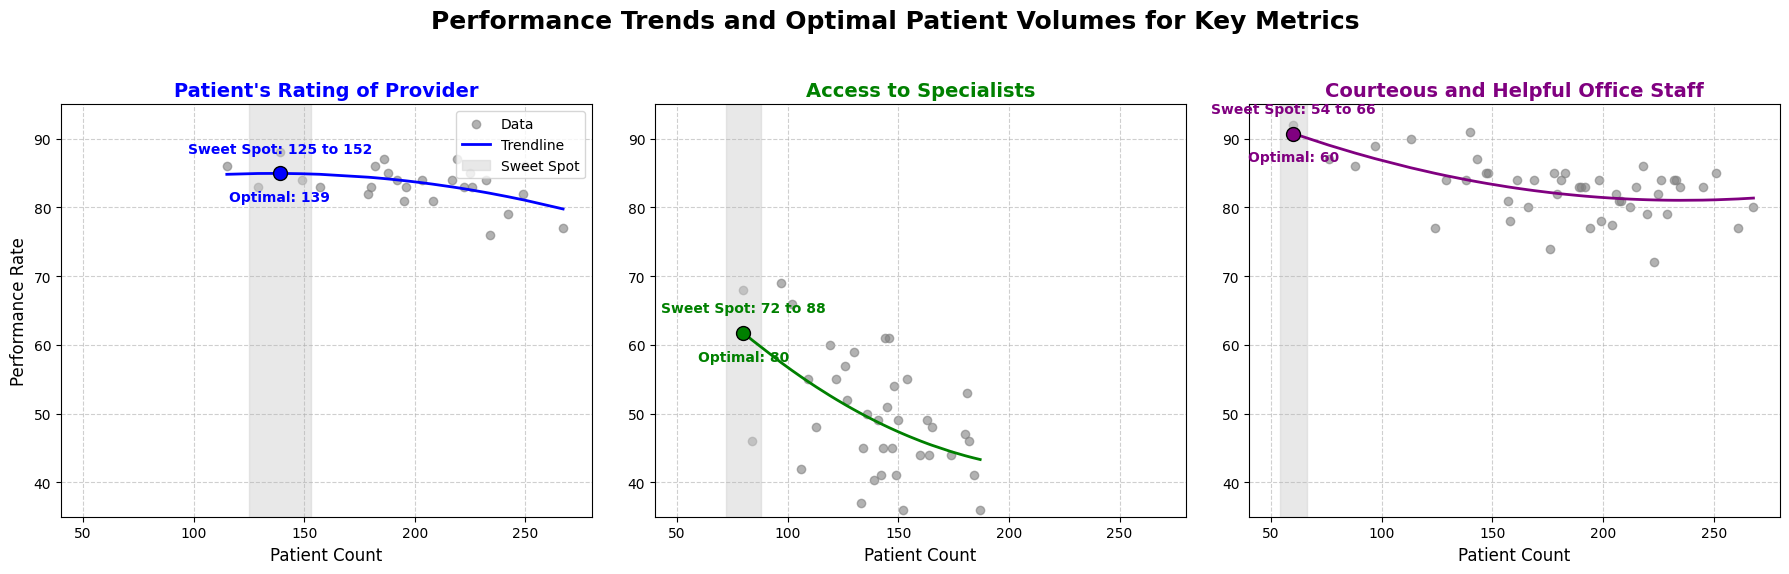

                                             Measure  \
0   CAHPS for MIPS SSM: Patient's Rating of Provider   
1          CAHPS for MIPS SSM: Access to Specialists   
2  CAHPS for MIPS SSM: Courteous and Helpful Offi...   

   Highest Point (Patient Count)  Highest Point (Performance)  \
0                          139.0                    84.950560   
1                           80.0                    61.739495   
2                           60.0                    90.753122   

   Correlation Coefficient  R² Value  Peak-to-Trough Difference  
0                -0.452006  0.860964                   5.174734  
1                -0.505239  0.968497                  18.417934  
2                -0.501523  0.837065                   9.715748  


In [190]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance_trends():
    """
    Plots performance trends and identifies optimal patient volumes for selected measures.

    Args:
        None
    Returns:
        None
    """

    # Define consistent y-axis and x-axis limits
    y_min, y_max = 35, 95  # Performance Rate range
    x_min, x_max = 40, 280  # Patient Count range

    # Define colors for measures
    colors = {
        "CAHPS for MIPS SSM: Patient's Rating of Provider": 'blue',
        "CAHPS for MIPS SSM: Access to Specialists": 'green',
        "CAHPS for MIPS SSM: Courteous and Helpful Office Staff": 'purple'
    }

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Performance Trends and Optimal Patient Volumes for Key Metrics", fontsize=18, fontweight="bold")

    # Quantitative metrics storage
    metrics_summary = []

    for ax, (measure, color) in zip(axs, colors.items()):
        subset = cleaned_data[cleaned_data['measure_title'] == measure]
        grouped = subset.groupby('patient_count')['prf_rate'].mean().reset_index()
        x = grouped['patient_count']
        y = grouped['prf_rate']

        # Fit a quadratic trendline
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)

        # Determine the highest point on the trendline
        vertex_x = -z[1] / (2 * z[0])
        vertex_y = p(vertex_x)
        highest_point_x = x[np.argmax(p(x))]
        highest_point_y = p(highest_point_x)

        # Calculate sweet spot (±10% of the highest point for simplicity)
        sweet_spot_start = max(x_min, highest_point_x * 0.9)
        sweet_spot_end = min(x_max, highest_point_x * 1.1)

        # Calculate quantitative metrics
        r2 = np.corrcoef(x, p(x))[0, 1] ** 2  # R² value
        correlation = np.corrcoef(x, y)[0, 1]  # Correlation coefficient
        slope = z[0] * 2 * x + z[1]  # First derivative (rate of change)

        metrics_summary.append({
            'Measure': measure,
            'Highest Point (Patient Count)': highest_point_x,
            'Highest Point (Performance)': highest_point_y,
            'Correlation Coefficient': correlation,
            'R² Value': r2,
            'Peak-to-Trough Difference': max(p(x)) - min(p(x))
        })

        # Plot data and trendline
        ax.scatter(x, y, color='grey', alpha=0.6, label='Data')
        ax.plot(x, p(x), color=color, label='Trendline', linewidth=2)

        # Highlight sweet spot
        ax.axvspan(sweet_spot_start, sweet_spot_end, color='lightgrey', alpha=0.5, label='Sweet Spot')
        ax.annotate(f"Sweet Spot: {int(sweet_spot_start)} to {int(sweet_spot_end)}", xy=((sweet_spot_start + sweet_spot_end) / 2, highest_point_y),
                    xytext=(0, 15), textcoords="offset points", ha='center', fontsize=10, color=color, fontweight="bold")

        # Annotate highest point
        ax.scatter([highest_point_x], [highest_point_y], color=color, edgecolor='black', s=100, zorder=5)
        ax.annotate(f"Optimal: {int(highest_point_x)}", xy=(highest_point_x, highest_point_y),
                    textcoords="offset points", xytext=(0, -20), ha='center', fontsize=10, color=color, fontweight="bold")

        # Set axis labels and limits
        ax.set_title(measure.split(": ")[-1], fontsize=14, fontweight="bold", color=color)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xlabel("Patient Count", fontsize=12)
        ax.grid(axis="both", linestyle="--", alpha=0.6)
        if ax == axs[0]:
            ax.set_ylabel("Performance Rate", fontsize=12)

    # Add legend and show plot
    axs[0].legend(loc="upper right", fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Display quantitative metrics summary
    import pandas as pd
    metrics_df = pd.DataFrame(metrics_summary)
    print(metrics_df)
    
plot_performance_trends()




### How do performance trends vary across different measures?
**Purpose**
This visualization answers Question 5 by analyzing the distribution patterns and variability of performance rates for each measure.

**Insights:**
- Timely Care shows a broad range of performance rates, indicating variability in delivering timely care to patients.
- Provider Rating is centered around higher performance rates with less variability, suggesting consistent quality in this measure.
- Specialist Access displays a narrower range, indicating a focused but potentially challenging area for improvement.
- Health Education has a moderately wide range, highlighting variability in how effectively educational goals are met.
- Office Staff demonstrates high performance rates with minimal variability, suggesting consistent excellence in this area.
- Care Coordination has a narrow range and relatively lower rates compared to other measures, suggesting room for systemic improvement.

**Why It Answers the Question:**
This violin plot provides a clear visualization of the performance rate distributions for each measure, enabling comparisons of variability and central tendencies across different healthcare domains.

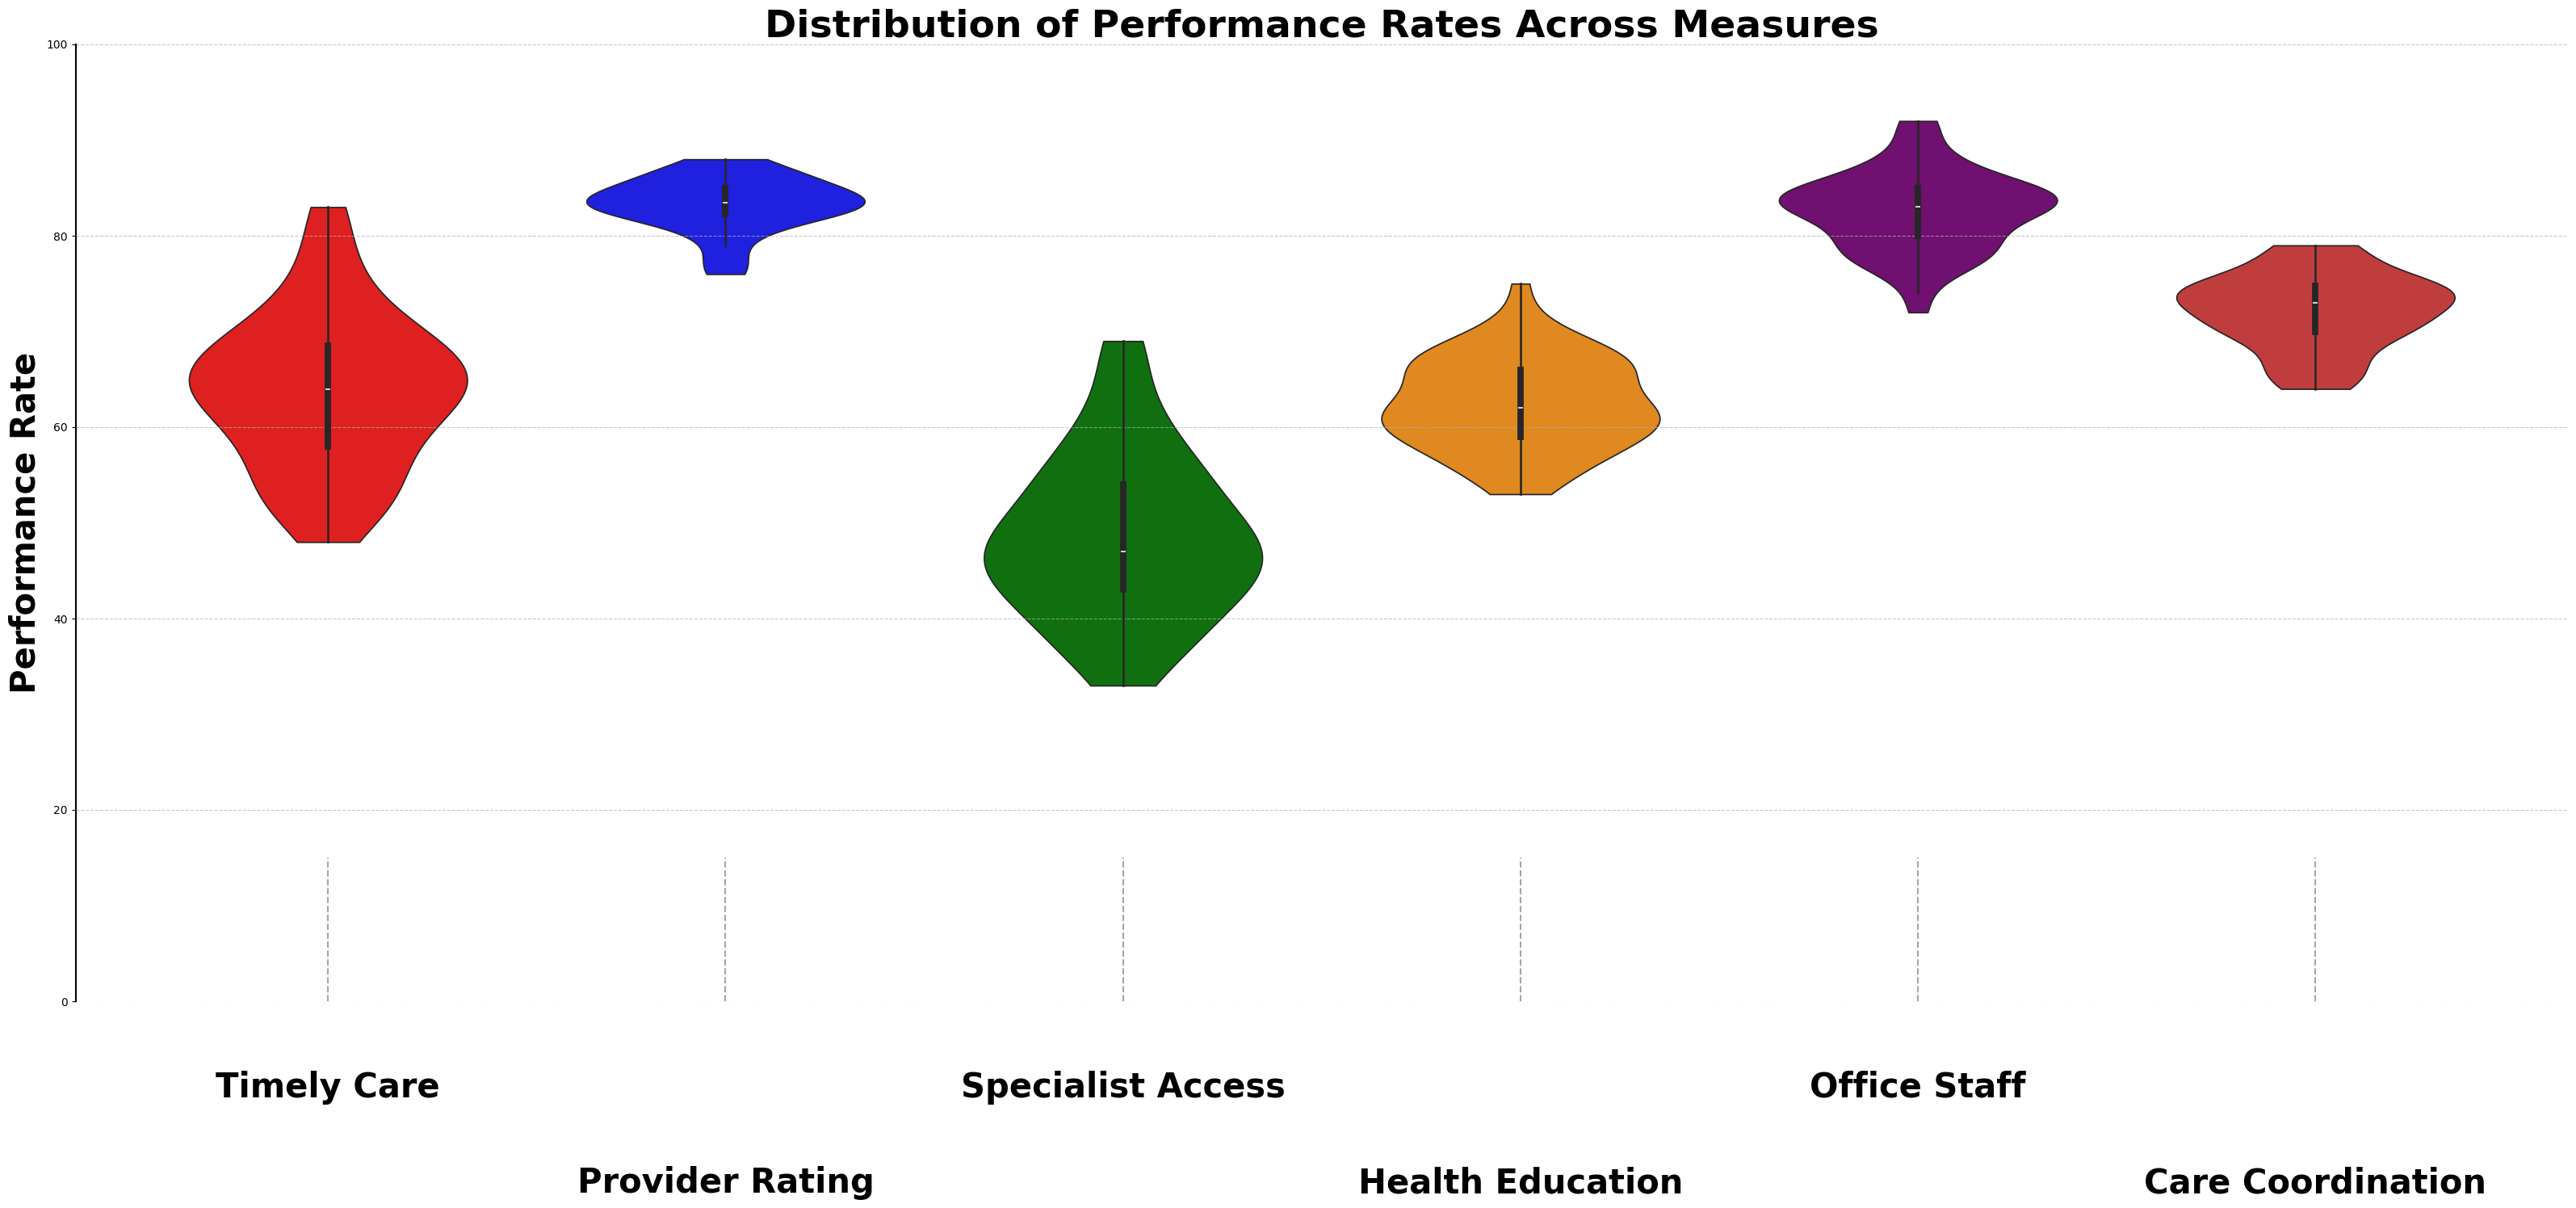

In [191]:
def plot_violin_performance_rates(data, title_mapping, colors, title):
    """
    Creates a violin plot to visualize the distribution of performance rates across measures.

    Args:
        data (pd.DataFrame): The dataset containing measures and performance rates.
        title_mapping (dict): Mapping of long measure titles to shorter titles for the plot.
        colors (list): List of colors for the measures.
        title (str): The title for the plot.

    Returns:
        None
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Apply title mapping to create shorter titles
    data = data.copy()  # Avoid modifying the original DataFrame
    data.loc[:, 'short_title'] = data['measure_title'].apply(
        lambda x: title_mapping.get(x.split(":")[-1].strip(), x.split(":")[-1].strip())
    )

    # Define color mapping
    unique_titles = data['short_title'].unique()
    color_mapping = dict(zip(unique_titles, colors))

    # Create the violin plot
    plt.figure(figsize=(32, 15))
    sns.violinplot(
        data=data,
        x='short_title',
        y='prf_rate',
        hue='short_title',
        palette=color_mapping,
        cut=0,
        density_norm='width',
        width=0.7,
        order=data['short_title'].unique()
    )

    # Adjust plot appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(1.5)

    # Add custom x-axis labels with vertical spacing and connecting dotted lines
    x_labels = data['short_title'].unique()
    for i, label in enumerate(x_labels):
        y_offset = -10 if i % 2 == 0 else -20
        plt.text(
            i, y_offset,
            label,
            ha='center', fontsize=30, fontweight='bold'
        )
        plt.plot([i, i], [0, 15], linestyle='--', color='grey', alpha=0.7)

    # Remove default x-axis line and ticks
    plt.gca().axes.get_xaxis().set_visible(False)

    # Add title and y-axis label
    plt.title(title, fontsize=34, fontweight='bold')
    plt.ylabel('Performance Rate', fontsize=30, fontweight='bold')
    plt.ylim(0, 100)

    # Add gridlines to the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

plot_violin_performance_rates(
    data=cleaned_data,
    title_mapping={
        "Getting Timely Care, Appointments, and Information": "Timely Care",
        "Patient's Rating of Provider": "Provider Rating",
        "Access to Specialists": "Specialist Access",
        "Health Promotion and Education": "Health Education",
        "Courteous and Helpful Office Staff": "Office Staff",
        "Care Coordination": "Care Coordination"
    },
    colors=['red', 'blue', 'green', '#FF8C00', 'purple', '#d62728'],
    title='Distribution of Performance Rates Across Measures'
)